In [1]:
"""
    This example shows how to use the Mesh class in order to generate a 
    geometry similar to those that may define a lifting surface planform.

   Y ^   B              This geometry is positioned in space with two chords
     |   +---+          simulating the root and tip chords, using points
     |  /    |          A and B to store their respective leading edge
     | /     | b        coordinates.
     |/      |          
     +-------+---->     With the parameters n and m, the grid density in the 
     A   c         X    chordwise and spanwise directions will be defined.
"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from vlm import Mesh

### Geometry definition

In [2]:
# Parameters
c = 1  # root chord length
b = 10  # panel span length
n = 2  # number of panels chordwise
m = 3  # number of panels spanwise

# Wing
A = np.array([0, 0])  # root chord leading edge coordinates
B = np.array([c/2, b])  # tip chord leading edge coordinates

leading_edges_coord = [A, B]
chord_lengths = [c, c/2]

mesh = Mesh(leading_edges_coord, chord_lengths, n, m)

Points = mesh.points()
Panels = mesh.panels()

### Printing and plotting


 Point |    Coordinates 
------------------------
   0   | [0 0]
   1   | [0.17 3.33]
   2   | [0.33 6.67]
   3   | [ 0.5 10. ]
   4   | [0.5 0. ]
   5   | [0.58 3.33]
   6   | [0.67 6.67]
   7   | [ 0.75 10.  ]
   8   | [1. 0.]
   9   | [1.   3.33]
  10   | [1.   6.67]
  11   | [ 1. 10.]


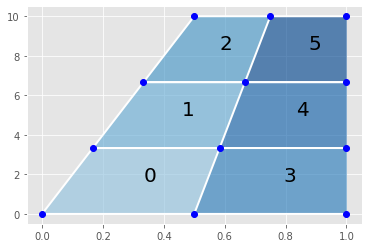


 Panel | Chrd % |  Span  |   Points coordinates
------------------------------------------------
    0  |  25.0  |   3.33 |  [0.5 0. ] [0 0] [0.17 3.33] [0.58 3.33]
    1  |  25.0  |   3.33 |  [0.58 3.33] [0.17 3.33] [0.33 6.67] [0.67 6.67]
    2  |  25.0  |   3.33 |  [0.67 6.67] [0.33 6.67] [ 0.5 10. ] [ 0.75 10.  ]
    3  |  75.0  |   3.33 |  [1. 0.] [0.5 0. ] [0.58 3.33] [1.   3.33]
    4  |  75.0  |   3.33 |  [1.   3.33] [0.58 3.33] [0.67 6.67] [1.   6.67]
    5  |  75.0  |   3.33 |  [1.   6.67] [0.67 6.67] [ 0.75 10.  ] [ 1. 10.]


In [3]:
# Points of the mesh
print('\n Point |    Coordinates ')
print('------------------------')
for p, i in zip(Points, range(len(Points))):
    print('  %2s   |' % i, np.round(p, 2))

# Mesh
plt.style.use('ggplot')
colors = plt.cm.Blues(np.linspace(0, 1, len(Panels) + 5))

for p, i in zip(Panels, range(len(Panels))):
    col = colors[i + 4]
    
    x = [p.P1[0], p.P2[0], p.P3[0], p.P4[0]]
    y = [p.P1[1], p.P2[1], p.P3[1], p.P4[1]]
    
    plt.fill(x, y, c=col, alpha=0.65)
    plt.plot(x, y, c='w', lw=2)
    centre = (p.P1 + p.P3) / 2
    plt.text(centre[0], centre[1], i, color='k', fontsize=20)

for p in Points:
    plt.plot(p[0], p[1], 'bo')
plt.show()

# Panels distribution
print('\n Panel | Chrd % |  Span  |   Points coordinates')
print('------------------------------------------------')
for p, i in zip(Panels, range(len(Panels))):
    print('  %3s  |  %4.1f  | %6.2f | '
         % (i, 100*p.chordwise_position,  p.span),
            np.round(p.P1, 2), np.round(p.P2, 2),
            np.round(p.P3, 2), np.round(p.P4, 2))